In [1]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('cleaned_titanic.csv')  
print(df.shape)
df.head()

(891, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [2]:
# Drop unnecessary columns
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)

# Target variable
y = df['Survived']

# Check shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (891, 7)
Target shape: (891,)


In [3]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the shape of the splits
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (712, 7)
X_test: (179, 7)
y_train: (712,)
y_test: (179,)


In [4]:
cols_to_drop = ['Name', 'Ticket', 'PassengerId']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']

In [7]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid modifying original
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# List of columns to encode (adjust based on your dataset)
categorical_cols = ['Sex', 'Embarked']  # You might have more

# Encode using LabelEncoder
encoder = LabelEncoder()

for col in categorical_cols:
    X_train_encoded[col] = encoder.fit_transform(X_train_encoded[col])
    X_test_encoded[col] = encoder.transform(X_test_encoded[col])


In [12]:
# Combine training and testing data before encoding (optional but safer)
X_full = pd.concat([X_train, X_test], axis=0)

# Apply one-hot encoding
X_encoded = pd.get_dummies(X_full)

# Split them back
X_train = X_encoded.iloc[:len(X_train), :]
X_test = X_encoded.iloc[len(X_train):, :]


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

# Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    ...


    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='F1 Score', ascending=False))


                 Model  Accuracy  Precision    Recall  F1 Score
2        Random Forest  0.810056   0.770270  0.770270  0.770270
0  Logistic Regression  0.810056   0.785714  0.743243  0.763889
1        Decision Tree  0.776536   0.712500  0.770270  0.740260
3                  KNN  0.720670   0.714286  0.540541  0.615385
4                  SVM  0.659218   0.760000  0.256757  0.383838


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [15]:
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],        # Regularization strength
    'penalty': ['l1', 'l2'],             # Type of regularization
    'solver': ['liblinear', 'saga']      # Solvers that support l1/l2
}

In [16]:
# Initialize model
log_reg = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [17]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.7963065103910174


In [18]:
# Use best estimator to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Test Accuracy: 0.7932960893854749
Precision: 0.7681159420289855
Recall: 0.7162162162162162
F1 Score: 0.7412587412587412


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.close()

In [20]:
from sklearn.metrics import roc_curve, auc

y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities from your trained model
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve.png")
plt.close()

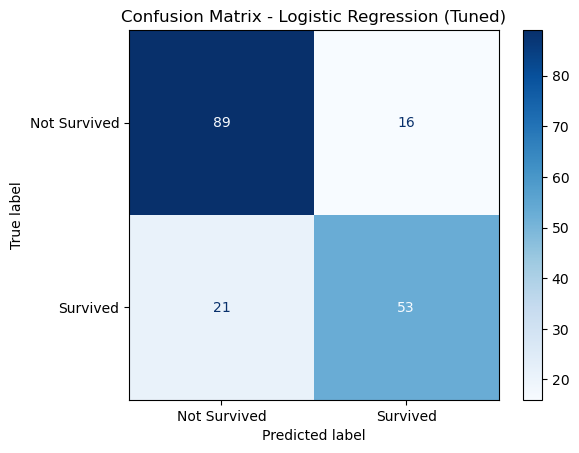

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict using best model
y_pred = grid_search.predict(X_test)

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (Tuned)")
plt.savefig("log_reg_confusion_matrix.png")  # Save image
plt.show()


In [23]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived'])
print(report)

              precision    recall  f1-score   support

Not Survived       0.81      0.85      0.83       105
    Survived       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [24]:
with open("log_reg_best_params.txt", "w") as f:
    f.write(f"Best Parameters: {grid_search.best_params_}\n")
    f.write(f"Best Accuracy: {grid_search.best_score_}\n")

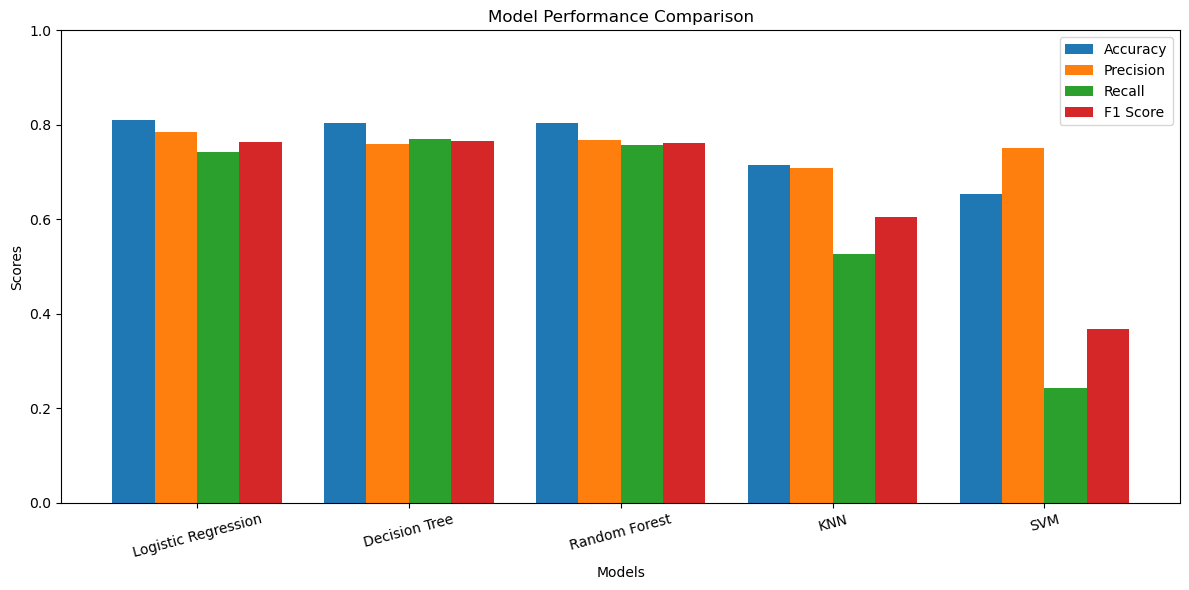

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and evaluation metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM']

accuracy = [0.810056, 0.804469, 0.804469, 0.715084, 0.653631]
precision = [0.785714, 0.760000, 0.767123, 0.709091, 0.750000]
recall = [0.743243, 0.770270, 0.756757, 0.527027, 0.243243]
f1 = [0.763889, 0.765101, 0.761905, 0.604651, 0.367347]

# Position of bars on X axis
x = np.arange(len(models))
width = 0.2  # Width of each bar

# Create subplots
plt.figure(figsize=(12, 6))

# Plot bars
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1 Score')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, models, rotation=15)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()

# Save and show the plot
plt.savefig('model_comparison_bar_chart.png', dpi=300)
plt.show()

In [26]:
import joblib
joblib.dump(best_model, 'logistic_model.pkl')

['logistic_model.pkl']